<a href="https://colab.research.google.com/github/sharvaniyadav/ECE1512-Digital-Image-Processing-/blob/main/ECE1512_Assignment_1_Sharvani_Yadav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Part A: Image Enhancement Using Intensity Transformations**


### Cell 1 - Setup & Helper Functions
(Imports + small functions to show images nicely)

In [8]:
# Step 1: Getting all the tools ready

import cv2                      # to open and save images
import numpy as np              # to do math on the image pixels
import matplotlib.pyplot as plt # to show images and graphs

# function to display an image nicely
def display_image(image_data, title_text=""):
    # make a square figure
    plt.figure(figsize=(5, 5))
    # show in grayscale, force range 0 to 1 so it's consistent
    plt.imshow(image_data, cmap="gray", vmin=0, vmax=1)
    plt.title(title_text)
    plt.axis("off")  # no axis ticks or numbers
    plt.show()

# function to convert an image from [0,1] float to 0-255 int so we can save it
def convert_to_8bit(image_data):
    # multiply by 255, round, and make sure values stay in range
    image_scaled = np.round(image_data * 255)
    image_scaled = np.clip(image_scaled, 0, 255)
    return image_scaled.astype(np.uint8)

### Cell 2 - Load and Normalize Image
(Read the TIFF file, convert to grayscale if needed, scale to 0–1)

Image shape: (976, 746) Data type: uint8 Min/Max pixel values: 0 255
After normalization -> Min: 0.0 Max: 1.0


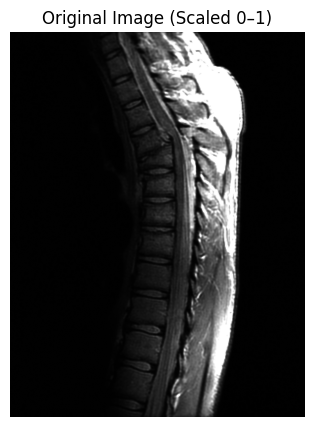

In [10]:
# Step 2: I loaded my image and scaled it between 0 and 1

# I set the path to my image file
image_path = "/content/fig38a.tif"

# I read the image exactly as it was stored (could have been 8-bit or 16-bit)
image_original = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

# If the image had 3 color channels, I converted it to grayscale
if image_original.ndim == 3:
    image_original = cv2.cvtColor(image_original, cv2.COLOR_BGR2GRAY)

# I printed the shape, type, and range of the image to see what I was working with
print("Image shape:", image_original.shape,
      "Data type:", image_original.dtype,
      "Min/Max pixel values:", image_original.min(), image_original.max())

# I found out what the maximum possible value could be (255 for 8-bit, 65535 for 16-bit, etc.)
if np.issubdtype(image_original.dtype, np.integer):
    max_pixel_value = np.iinfo(image_original.dtype).max
else:
    max_pixel_value = image_original.max() if image_original.max() > 0 else 1.0

# I converted my image to float and normalized it so that all values were between 0 and 1
image_normalized = image_original.astype(np.float32) / float(max_pixel_value)

# I printed the new range just to check that it worked
print("After normalization -> Min:", float(image_normalized.min()),
      "Max:", float(image_normalized.max()))

# I displayed the image so I could confirm it looked correct
display_image(image_normalized, "Original Image (Scaled 0–1)")

### Cell 3 - Log Transformation
(apply log transform with c=1 and normalize the result)

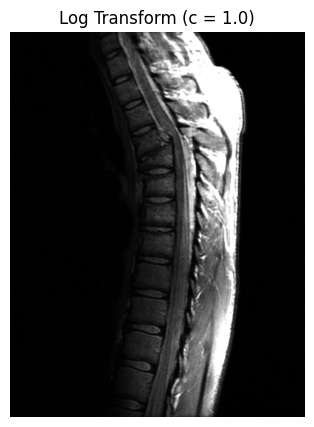

In [12]:
# Step 3: I applied the log transformation to enhance the dark regions

# I wrote a function to do the log transform using the formula s = c * log(1 + r)
def apply_log_transform(input_image, c_value=1.0):
    # I added 1 inside the log so that any 0 pixels would not cause math errors
    log_result = c_value * np.log1p(input_image)                                 #note to self: np.log1p -> log(1+...)
    # I normalized the result back to 0–1 so that it could be displayed properly
    log_result = (log_result - log_result.min()) / (log_result.max() - log_result.min() + 1e-8)
    return log_result.astype(np.float32)

# I tried the log transform with c = 1.0
log_image_result = apply_log_transform(image_normalized, c_value=1.0)

# I displayed the result so I could see how the log transform affected the image
display_image(log_image_result, "Log Transform (c = 1.0)")

### Cell 4 - Gamma Transform Experiments
(try multiple gamma values to see which one looks best)

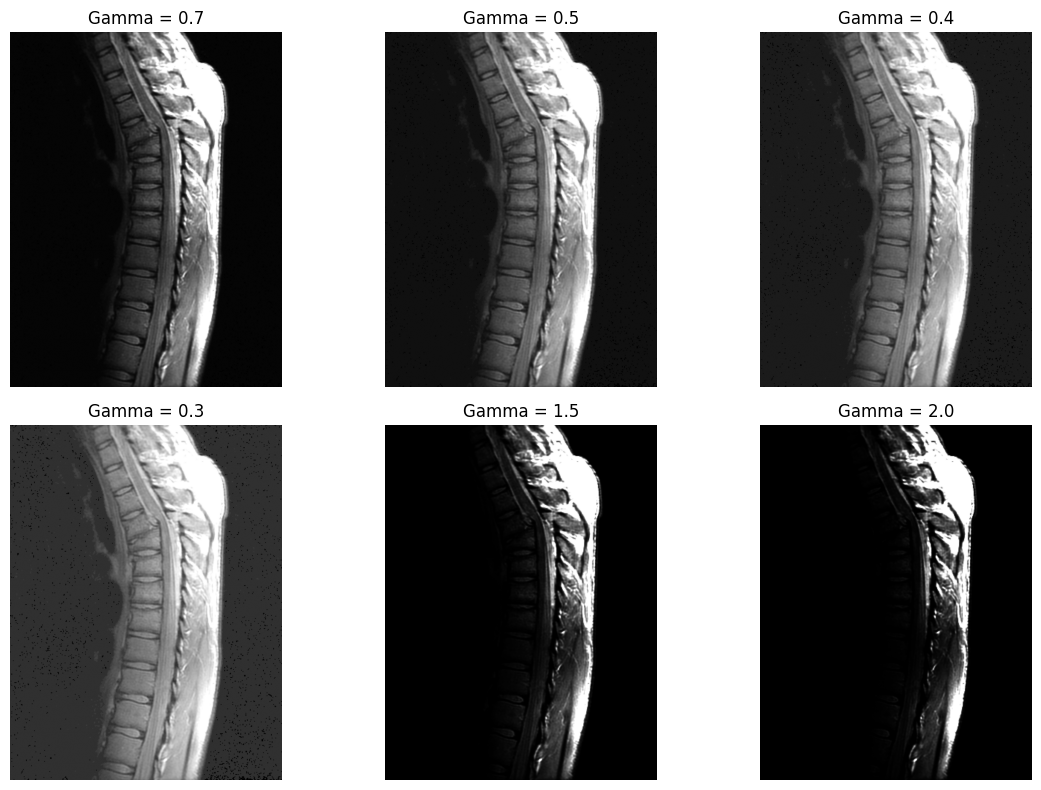

In [14]:
# Step 4: I applied the gamma (power-law) transformation and tested different gamma values

# I wrote a function to do the power-law transform using the formula s = c * r^gamma
def apply_gamma_transform(input_image, gamma_value=0.5, c_value=1.0):
    # I raised each pixel to the power of gamma and multiplied by c
    gamma_result = c_value * np.power(input_image, float(gamma_value))
    # I normalized the result so it stayed between 0 and 1
    gamma_result = (gamma_result - gamma_result.min()) / (gamma_result.max() - gamma_result.min() + 1e-8)
    return gamma_result.astype(np.float32)

# I made a list of gamma values I wanted to try
gamma_values_to_test = [0.7, 0.5, 0.4, 0.3, 1.5, 2.0]

# I displayed all the results together so I could compare them easily
num_images = len(gamma_values_to_test)
num_columns = 3
num_rows = int(np.ceil(num_images / num_columns))

plt.figure(figsize=(12, 4 * num_rows))
for index, gamma_val in enumerate(gamma_values_to_test, 1):
    plt.subplot(num_rows, num_columns, index)
    plt.imshow(apply_gamma_transform(image_normalized, gamma_value=gamma_val), cmap="gray", vmin=0, vmax=1)
    plt.title(f"Gamma = {gamma_val}")
    plt.axis("off")
plt.tight_layout()
plt.show()

### Cell 5 - Pick Best Results & Save
(choose my final c and gamma, display and save them)

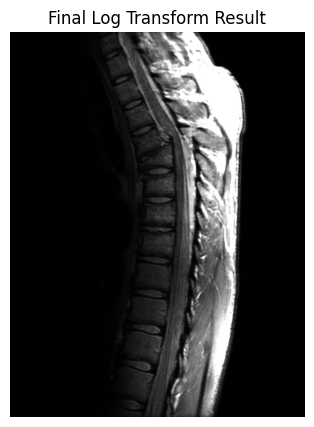

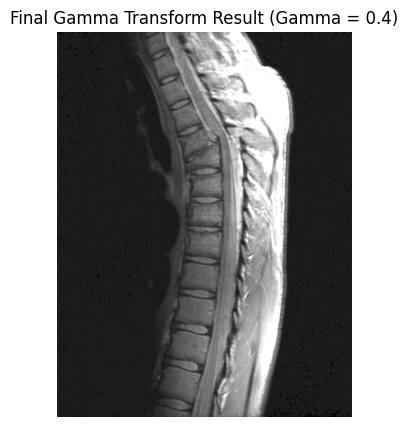

Saved files:
 - /content/partA_log_result.png
 - /content/partA_gamma_result.png


In [17]:
# Step 5: I saved my final chosen log and gamma results for my report

# I set my chosen values after looking at the results above
final_c_value = 1.0          # I kept c = 1.0 for the log transform
final_gamma_value = 0.4      # I picked gamma = 0.4 as my best result

# I re-applied the transformations with my chosen settings
final_log_result = apply_log_transform(image_normalized, c_value=final_c_value)
final_gamma_result = apply_gamma_transform(image_normalized, gamma_value=final_gamma_value)

# I displayed both results so I could double-check them visually
display_image(final_log_result, "Final Log Transform Result")
display_image(final_gamma_result, f"Final Gamma Transform Result (Gamma = {final_gamma_value})")

# I saved the results as PNGs (8-bit) so I can easily include them in my report
cv2.imwrite("/content/partA_log_result.png", to_uint8(final_log_result))
cv2.imwrite("/content/partA_gamma_result.png", to_uint8(final_gamma_result))

print("Saved files:")
print(" - /content/partA_log_result.png")
print(" - /content/partA_gamma_result.png")

### Cell 6 - Side-by-Side Comparison Figure
(plot original vs log vs gamma in one figure)

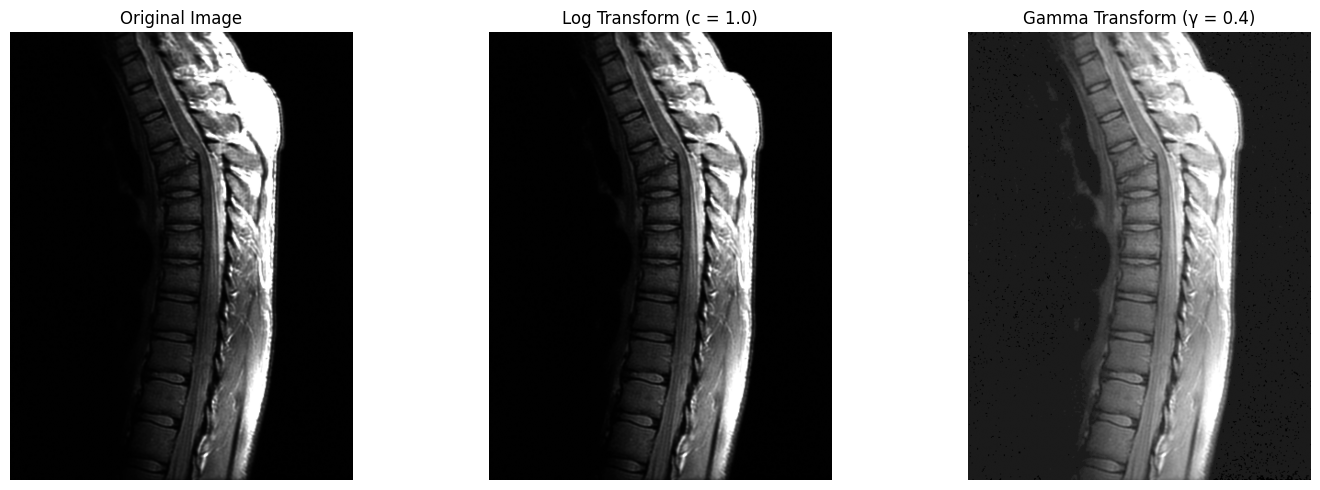

In [18]:
# Step 6: I created a single figure to compare original, log, and gamma results side by side

plt.figure(figsize=(15, 5))

# Left: original image
plt.subplot(1, 3, 1)
plt.imshow(image_normalized, cmap="gray", vmin=0, vmax=1)
plt.title("Original Image")
plt.axis("off")

# Middle: final log transform
plt.subplot(1, 3, 2)
plt.imshow(final_log_result, cmap="gray", vmin=0, vmax=1)
plt.title(f"Log Transform (c = {final_c_value})")
plt.axis("off")

# Right: final gamma transform
plt.subplot(1, 3, 3)
plt.imshow(final_gamma_result, cmap="gray", vmin=0, vmax=1)
plt.title(f"Gamma Transform (γ = {final_gamma_value})")
plt.axis("off")

# I used tight_layout so the images fit nicely without overlapping
plt.tight_layout()
plt.show()

### Cell 7 - Quick Write-Up Notes

In [19]:
# Step 7: I printed a quick summary of what I saw so I can drop it into my report later

summary = f"""
Part A Summary:
• I used the log transform with c = {final_c_value}. It slightly brightened the darker parts of the image while
  compressing the brighter areas, so the bright spine region stayed visible but not overexposed.
• I used the gamma transform with γ = {final_gamma_value}. Since γ < 1, it brightened the dark regions even more
  and made fine details in the spine stand out clearly.
• Comparing the two:
  – The log transform gave a more subtle overall brightening effect.
  – The gamma transform with γ = {final_gamma_value} gave a stronger enhancement to the shadows, which made
    structures easier to see without losing too much contrast.
"""

print(summary)



Part A Summary:
• I used the log transform with c = 1.0. It slightly brightened the darker parts of the image while 
  compressing the brighter areas, so the bright spine region stayed visible but not overexposed.
• I used the gamma transform with γ = 0.4. Since γ < 1, it brightened the dark regions even more 
  and made fine details in the spine stand out clearly.
• Comparing the two:
  – The log transform gave a more subtle overall brightening effect.
  – The gamma transform with γ = 0.4 gave a stronger enhancement to the shadows, which made 
    structures easier to see without losing too much contrast.

